In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# load dataset

mnist = fetch_openml('mnist_784')

In [3]:
mnist.data.shape

(70000, 784)

# Showing image using matplotlib

In [23]:
def show_image_p(frame, index):
    digit = frame.to_numpy()[index]
    digit_img = digit.reshape(28,28)
    
    plt.imshow(digit_img,cmap='binary')
    plt.axis('off')
    plt.show()

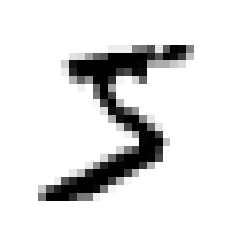

In [25]:
show_image_p(mnist.data,0)

# Showing image using opencv

In [6]:
import cv2 as cv

In [15]:
def show_image(frame, index):
    digit = frame.to_numpy()[index]
    digit_img = digit.reshape(28,28)
    
    cv.imshow('image',digit_img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [17]:
show_image(mnist.data,1)

In [487]:
# Split Dataset
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=0.30, random_state=0)

In [488]:
type(train_img)

pandas.core.frame.DataFrame

In [489]:
test_img_copy = test_img.copy()

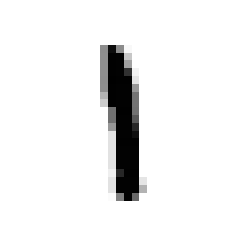

In [490]:
show_image_p(test_img_copy,2)

# Scalling our data

In [491]:
scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

# Applying PCA Algorithm

In [492]:
# Creating instance of a PCA Model (here variance is protected by 95%)
model_pca = PCA(0.95)

In [493]:
model_pca.fit(train_img) # applying PCA on trainin data

PCA(n_components=0.95)

In [494]:
# New dimension (Basically how many dimensions it has reduced to from 784 dimensions)
print(model_pca.n_components_)

323


In [495]:
# reducing both datasets from 784 to 323 using PCA transform
train_img = model_pca.transform(train_img)
test_img = model_pca.transform(test_img)

# Logistic Regression

lbfgs — Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative matrix updates with gradient evaluations. It stores only the last few updates, so it saves memory. It isn't super fast with large data sets.

Default solver in Logistic Regression

In [496]:
# using lbfgs solver
model = LogisticRegression(solver='lbfgs', max_iter=10000)

Training Logistic Regression model using training data

In [497]:
model.fit(train_img,train_lbl)

LogisticRegression(max_iter=10000)

In [498]:
model.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

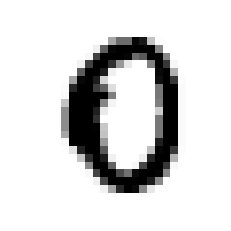

In [499]:
show_image_p(test_img_copy,0)

In [500]:
show_image(test_img_copy,0)

In [501]:
model.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

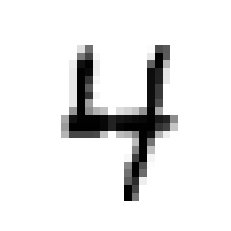

In [502]:
show_image_p(test_img_copy,1)

In [503]:
show_image(test_img_copy,1)

In [504]:
model.predict(test_img[42].reshape(1,-1))

array(['9'], dtype=object)

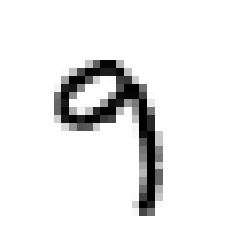

In [505]:
show_image_p(test_img_copy,42)

In [506]:
show_image(test_img_copy,42)

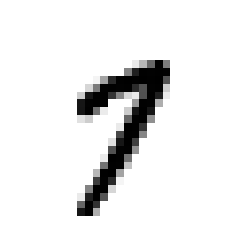

In [507]:
show_image_p(test_img_copy,177)

In [508]:
model.predict(test_img[177].reshape(1,-1))

array(['7'], dtype=object)

# Finding accuracy of the model

In [509]:
model.score(test_img, test_lbl)

0.9190952380952381

# Loading & Saving Model

In [510]:
import pickle

In [511]:
# save logistic Regression model
with open('Logistic_Regression_Model', 'wb') as files:
    pickle.dump(model, files)

In [512]:
# save logistic Regression model
with open('PCA', 'wb') as files:
    pickle.dump(model_pca, files)

In [ ]:
# load model
with open('Hand_Written_Digit_Recognition_model' , 'rb') as f:
    model = pickle.load(f)

# Testing Accuracy

In [174]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
pred = model.predict(test_img)
pred

array(['0', '4', '1', ..., '9', '0', '1'], dtype=object)

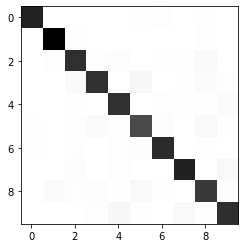

In [175]:
cm = confusion_matrix(test_lbl,pred)
cm
plt.imshow(cm, cmap='binary')

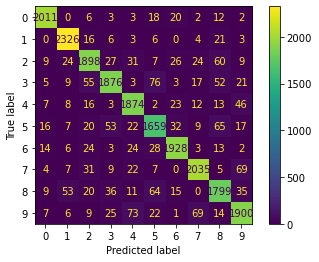

In [176]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

In [154]:
from sklearn import metrics
from tensorflow.keras.utils import to_categorical

In [155]:
print("Performance Report:")
pred_out = model.predict(test_img)

print('Accuracy score is :', metrics.accuracy_score(test_lbl, pred_out)*100)
print('Precision score is :', metrics.precision_score(test_lbl, pred_out, average='weighted')*100)
print('Recall score is :',metrics.recall_score(test_lbl,pred_out, average='weighted')*100)
print('F1 Score is :', metrics.f1_score(test_lbl, pred_out,average='weighted')*100)

Performance Report:
Accuracy score is : 91.9095238095238
Precision score is : 91.90199431188832
Recall score is : 91.9095238095238
F1 Score is : 91.89734398537477
